# Homework 2: Discovery of Frequent Itemsets and Association Rules

Date: 22/11/2021

Authors: Alessandro Sanvito and Thuany Karoline Stuart

# Solution

# How to Run

To run the conducted experiments, follow the steps:

1. Unzip the file containing the homework.
1. Ensure to have Python 3 installed on your machine.
1. Ensure that NumPy, Typing, Itertools and Jupyter Notebook are installed in your environment.
1. Download the "T10I4D100K.dat" dataset file from the Homework 2 description in Canvas.
1. Move the dataset file to the folder ./data
1. Start Jupyter Notebook.
1. In Jupyter Notebook, open the notebook "Discovery of Frequent Itemsets and Association Rules" in the folder /src of the homework.
1. Press "run all".

# Experiments

## Set up

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

from a_priori import *
from rule_generation import *

sns.set_style('whitegrid')

C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.2V74HQ3MKNZHDCKJELIPPY7V6QMK3UOZ.gfortran-win32.dll
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.U35RT5X5BPDSH5ZTF276YADQR2KDU6PR.gfortran-win32.dll
  stacklevel=1)


### Define Path

In [2]:
path = os.path.dirname(os.getcwd())
data_path = os.path.join(path, 'data', 'T10I4D100K.dat')
data_path

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab2\\data\\T10I4D100K.dat'

## Frequent Itemsets

In [3]:
freq_items = find_frequent_item_sets(file=data_path, s=1000, verbose=True)

The market contains 870 different items.
The average support is 1161.18
The most frequent singletons have been calculated. 375 singletons was/were found.
Computing frequent itemsets of length 2...
70125 candidates generated!
Done! 9 frequent items was/were found.
Computing frequent itemsets of length 3...
4 candidates generated!
Done! 1 frequent items was/were found.

In total 385 frequent items were found.


In [4]:
supports = [500, 750, 1000, 1250, 1500]
durations = []
n_freq_items = []

for s in supports:
  start = time.time()
  freq_items = find_frequent_item_sets(file=data_path, s=s, verbose=False)
  duration = time.time() - start
  
  durations.append(duration)
  n_freq_items.append(len(freq_items))

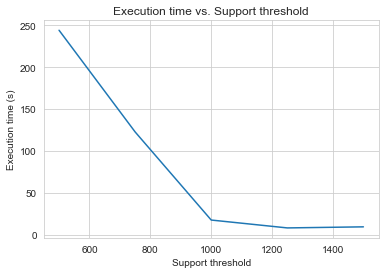

In [5]:
plt.plot(supports, durations)
plt.xlabel('Support threshold')
plt.ylabel('Execution time (s)')
plt.title('Execution time vs. Support threshold')
plt.show()

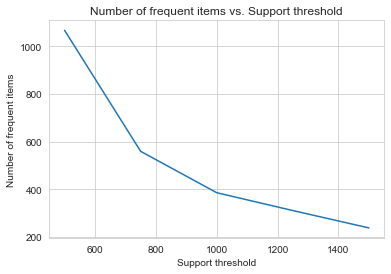

In [6]:
plt.plot(supports, n_freq_items)
plt.xlabel('Support threshold')
plt.ylabel('Number of frequent items')
plt.title('Number of frequent items vs. Support threshold')
plt.show()

## Association Rules

In [7]:
freq_items = find_frequent_item_sets(file=data_path, s=1000, verbose=True);

The market contains 870 different items.
The average support is 1161.18
The most frequent singletons have been calculated. 375 singletons was/were found.
Computing frequent itemsets of length 2...
70125 candidates generated!
Done! 9 frequent items was/were found.
Computing frequent itemsets of length 3...
4 candidates generated!
Done! 1 frequent items was/were found.

In total 385 frequent items were found.


In [8]:
confidences = [0.1, 0.3, 0.5, 0.7, 0.9]
durations = []
n_rules = []

for c in confidences:
  start = time.time()
  rules = generate_rules(frequent_item_sets=freq_items, c=c)
  duration = time.time() - start
  
  durations.append(duration)
  n_rules.append(len(rules))

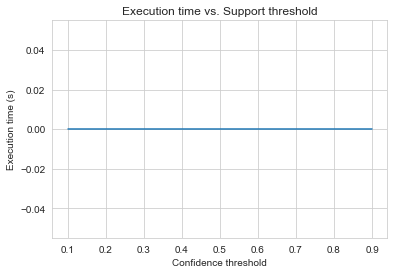

In [9]:
plt.plot(confidences, durations)
plt.xlabel('Confidence threshold')
plt.ylabel('Execution time (s)')
plt.title('Execution time vs. Support threshold')
plt.show()

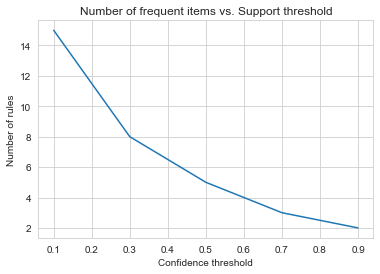

In [10]:
plt.plot(confidences, n_rules)
plt.xlabel('Confidence threshold')
plt.ylabel('Number of rules')
plt.title('Number of frequent items vs. Support threshold')
plt.show()